In [14]:
import meitner
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

In [15]:
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [16]:
id = 'Au 4f 655'
x = meitner.Pes.from_vamas('au3-0001.pxt.vms', region_id=id, normalize=True, n_peaks=2, dict_keys=['Au'])

Excitation energy:
655.0 eV


In [17]:
x.generate_params(be_guess=[83,87], peak_spacings=[1,0,3.67], peak_ratios=[1,0,0.75])
x.fit_data()

False


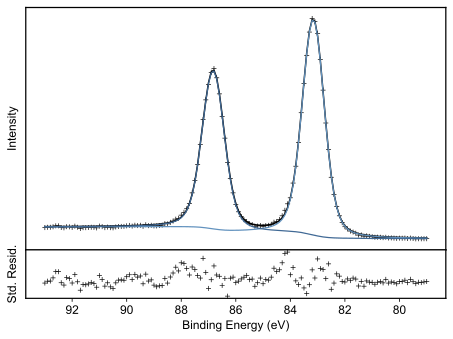

In [18]:
x.plot_result(subtract_bg=False)

In [19]:
x.result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
data_Au_p0_amplitude,1.13198216,0.00323132,(0.29%),1.5,0.00000000,inf,True,
data_Au_p0_center,83.1587647,9.6579e-04,(0.00%),83,79.0000000,93.0000000,True,
data_Au_p0_sigma,0.39866051,0.00324655,(0.81%),1,0.00000000,inf,True,
data_Au_p0_gamma,0.14246688,0.00373320,(2.62%),1,0.00000000,inf,True,
data_Au_p0_gfwhm,0.79732101,0.00649309,(0.81%),2,-inf,inf,False,2*data_Au_p0_sigma
data_Au_p0_lfwhm,0.28493375,0.00746639,(2.62%),2,-inf,inf,False,2*data_Au_p0_gamma
data_Au_p0_glmix,0.26327789,0.00000000,(0.00%),0.5,0.00000000,1.00000000,False,data_Au_p0_lfwhm/(data_Au_p0_lfwhm+data_Au_p0_gfwhm)
data_Au_p0_fwhm,0.95241602,0.00308116,(0.32%),3,0.00000000,3.00000000,False,"calc_voigt_fwhm(data_Au_p0_sigma,data_Au_p0_gamma)"
data_Au_p1_amplitude,0.84898662,0.00242349,(0.29%),1.125,-inf,inf,False,data_Au_p0_amplitude*data_Au_p1_p0_ratio
data_Au_p1_center,86.8287647,9.6579e-04,(0.00%),86.67,-inf,inf,False,data_Au_p0_center+data_Au_p1_p0_spacing
